In [41]:
# Data Science
import numpy as np
import pandas as pd

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# plotly standard imports
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
# import plotly.io as pio

# Cufflinks wrapper on plotly
import cufflinks as cf

In [42]:
cf.go_offline()
# Setup Global Theme
cf.set_config_file(world_readable=True, theme='space', offline=True)

# Input Cells

In [43]:
demography = pd.read_excel('data/all.xlsx')

In [44]:
demography.drop_duplicates('ID', inplace=True)

In [45]:
demography = demography.drop('ID', axis=1)

# Favourite category

In [46]:
demography.value_counts('Favourite category').iplot(kind='barh', linecolor="black", title="Count by Category")

# Weekly income + Quality

In [47]:
demography.groupby('Favourite category').agg({
    "Weekly income": ['mean', 'median'],
    "Preferred quality": ['mean', 'median'],
    "Name": 'size'}).style.background_gradient()

In [78]:
demography.iplot(
    x='Preferred quality',
    y='Weekly income',
    mode="markers",
    categories='Favourite category',
    xTitle='Preferred quality',
    yTitle='Weekly income',
    title='Correlation between Weekly Income and Quality')

/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [49]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

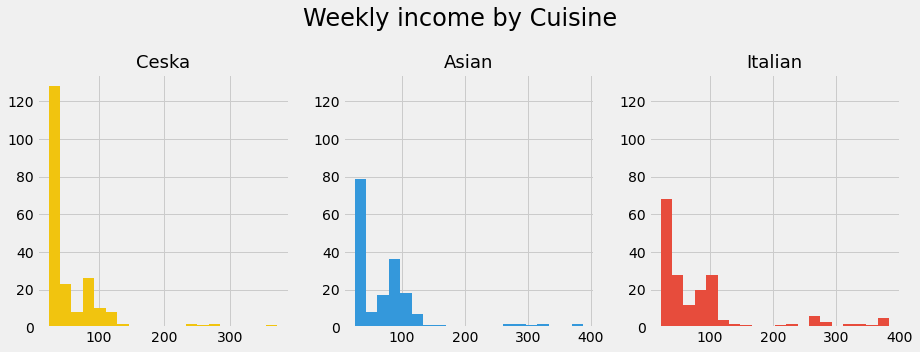

In [50]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(13,5))
plt.suptitle("Weekly income by Cuisine", fontsize=24)
ax = plt.subplot(1,3,1)

plt.hist(cz['Weekly income'], label='Ceska', color='#f1c40f', bins=20)
plt.title('Ceska', fontsize=18)

plt.subplot(1,3, 2, sharey=ax)
plt.hist(asian['Weekly income'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)

plt.subplot(1,3, 3, sharey=ax)
plt.hist(it['Weekly income'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.tight_layout()

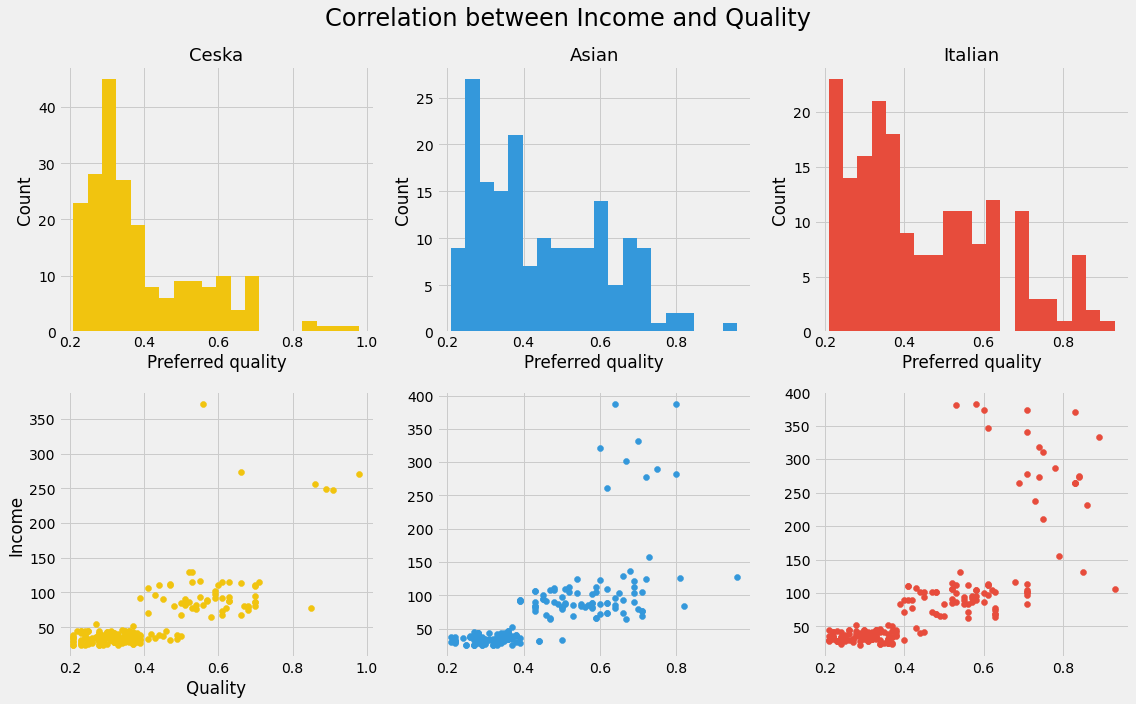

In [51]:
plt.figure(figsize=(16,10))
plt.suptitle("Correlation between Income and Quality", fontsize=24)
plt.tight_layout()

plt.subplot(2,3,1)
plt.title('Ceska', fontsize=18)
plt.hist(cz['Preferred quality'], label='Ceska', color='#f1c40f', bins=20)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,4)
plt.scatter(cz['Preferred quality'], cz['Weekly income'], label='Ceska', color='#f1c40f')
plt.xlabel('Quality')
plt.ylabel('Income')
# plt.ylim(0, 400)

plt.subplot(2,3,2)
plt.hist(asian['Preferred quality'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,5)
plt.scatter(asian['Preferred quality'], asian['Weekly income'], label='Asian', color='#3498db')

plt.subplot(2,3,3)
plt.hist(it['Preferred quality'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,6)
plt.scatter(it['Preferred quality'], it['Weekly income'], label='Italian', color='#e74c3c')
plt.tight_layout();

# Stratification by Income

In [52]:
def income_stratification(x):
    if x <= 50:
        return 'low income'
    elif 50 < x <= 150:
        return 'medium income'
    return 'high income'

In [53]:
demography['Stratification by income'] = np.vectorize(income_stratification)(demography['Weekly income'])

## Visual Count by Income

In [54]:
stratification_graph = demography.groupby(by=['Favourite category', 'Stratification by income']).size().unstack()
stratification_graph.iplot(kind='bar', linecolor="black", title="Count by Income Category")

# Ad Type

In [55]:
gbo = demography.groupby(by=['Favourite category', 'Favourite ad type']).size().unstack()
gbo.iplot(kind='bar', linecolor="black", title="Count by Ad type category")

# Более точная выборка дней по кухне и рекламе [cz, asian, it]

In [56]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

# New Method

In [77]:
medium_ads = demography[demography['Stratification by income'] == 'medium income']
medium_ads = medium_ads.groupby(by=['Favourite category', 'Favourite ad type']).size().unstack()
medium_ads.iplot(kind='bar', linecolor="black", title="AD TYPE, Income Category=MEDIUM")

In [66]:
medium_asian = asian[asian['Stratification by income'] == 'medium income']
medium_asian.drop(columns=['Name', 'Gender', 'Favourite category',
                           'Stratification by income'], inplace=True)

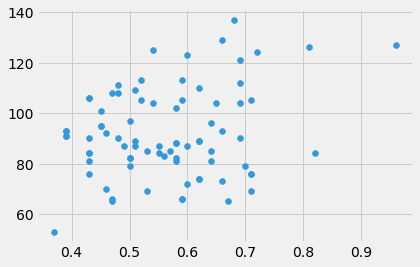

In [67]:
plt.scatter(medium_asian['Preferred quality'], medium_asian['Weekly income'], label='Asian', color='#3498db')

In [70]:
medium_asian = medium_asian[medium_asian['Favourite ad type'] == 'promo stand big']

In [71]:
medium_asian = medium_asian.describe(include='object').drop(['count', 'unique'])

In [72]:
medium_asian.transpose()

,top,freq
Favourite ad type,promo stand big,37
MON 0-8h,Office district,34
MON 8-16h,Office district,21
MON 16-24h,Park,16
TUE 0-8h,Office district,35
TUE 8-16h,Office district,21
TUE 16-24h,Park,21
WED 0-8h,Office district,22
WED 8-16h,Historical center,18
WED 16-24h,Park,21


In [73]:
# Посчитать количество людей всего по месту
# Наложить на них аккамулярующий график с рекламами

In [74]:
demography.groupby(['Favourite category', 'Stratification by income']).median()

Age  Weekly income  \
Favourite category Stratification by income                        
Asian cuisine      high income               49.5          296.0   
                   low income                57.0           34.0   
                   medium income             57.0           89.0   
Czech cuisine      high income               48.5          263.5   
                   low income                48.0           35.0   
                   medium income             48.0           87.5   
Italian cuisine    high income               55.0          278.0   
                   low income                53.0           35.0   
                   medium income             48.5           94.5   

                                             Preferred quality  
Favourite category Stratification by income                     
Asian cuisine      high income                           0.710  
                   low income                            0.300  
                   medium income                         0.565  
Czech cuisine      high income                           0.875  
                   low income                            0.310  
                   medium income                         0.575  
Italian cuisine    high income                           0.750  
                   low income                            0.310  
                   medium income                         0.550

# WIP

In [75]:
it['MON 16-24h'].value_counts().reset_index().transpose()

,0,1,2,3,4,5,6,7,8
index,Housing district,Park,Office district,Outskirts,City center,Historical center,Built-up,Riverfront,University campus
MON 16-24h,110,25,12,10,10,7,7,3,1
